In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [3]:
!pip install kaggle

In [5]:
kaggle_credentials=json.load(open('kaggle (2).json'))

In [7]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [8]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:19<00:00, 265MB/s]
100% 2.04G/2.04G [00:19<00:00, 114MB/s]


In [9]:
!ls

'kaggle (2).json'   plantvillage-dataset.zip   sample_data


In [10]:
with ZipFile('plantvillage-dataset.zip') as temp:
  temp.extractall()

In [11]:
base='plantvillage dataset/color'

In [12]:
sample_img='/content/plantvillage dataset/color/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG'

(256, 256, 3)
[[[129 115 114]
  [133 119 118]
  [110  96  95]
  ...
  [115  99  99]
  [134 118 118]
  [160 144 144]]

 [[128 114 113]
  [130 116 115]
  [152 138 137]
  ...
  [143 127 127]
  [161 145 145]
  [117 101 101]]

 [[105  91  90]
  [157 143 142]
  [139 125 124]
  ...
  [149 133 133]
  [130 114 114]
  [145 129 129]]

 ...

 [[224 219 216]
  [221 216 213]
  [217 212 209]
  ...
  [189 177 177]
  [189 177 177]
  [189 177 177]]

 [[222 217 214]
  [219 214 211]
  [215 210 207]
  ...
  [188 176 176]
  [188 176 176]
  [190 178 178]]

 [[213 208 205]
  [211 206 203]
  [208 203 200]
  ...
  [191 179 179]
  [191 179 179]
  [193 181 181]]]


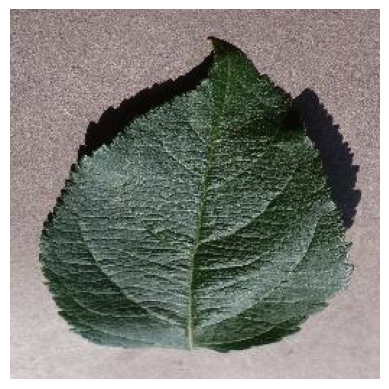

In [17]:
img=mpimage.imread(sample_img)
print(img.shape)
plt.imshow(img)
plt.axis('off')
print(img)

In [16]:
img_size=224
batch_size=32

In [18]:
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [19]:
train_gen=data_gen.flow_from_directory(base,target_size=(img_size,img_size),batch_size=batch_size,subset='training',class_mode='categorical')

Found 43456 images belonging to 38 classes.


In [20]:
val_gen=data_gen.flow_from_directory(base,target_size=(img_size,img_size),batch_size=batch_size,subset='validation',class_mode='categorical')

Found 10849 images belonging to 38 classes.


In [21]:
model=models.Sequential()

In [23]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_gen.num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,425,670 (9.25 MB)

 Trainable params: 2,425,670 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(train_gen,steps_per_epoch=train_gen.samples//batch_size,epochs=5,validation_data=val_gen,validation_steps=val_gen.samples//batch_size)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5633 - loss: 1.5963

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 79ms/step - accuracy: 0.5634 - loss: 1.5958 - val_accuracy: 0.8707 - val_loss: 0.4160
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 129s 74ms/step - accuracy: 0.8852 - loss: 0.3548 - val_accuracy: 0.8830 - val_loss: 0.3618
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 69ms/step - accuracy: 0.9360 - loss: 0.1964 - val_accuracy: 0.9174 - val_loss: 0.2730
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 66ms/step - accuracy: 0.9574 - loss: 0.1262 - val_accuracy: 0.9194 - val_loss: 0.2729
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.9656 - loss: 0.1047 - val_accuracy: 0.9285 - val_loss: 0.2534


In [29]:
print('Evaluating Model : ')
val_loss,val_acc=model.evaluate(val_gen,steps=val_gen.samples//batch_size)
print('Validation Accuracy : ',val_acc)
print('Validation_loss : ',val_loss)

Evaluating Model : 
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9297 - loss: 0.2434
Validation Accuracy :  0.9284660816192627
Validation_loss :  0.2533632516860962


In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

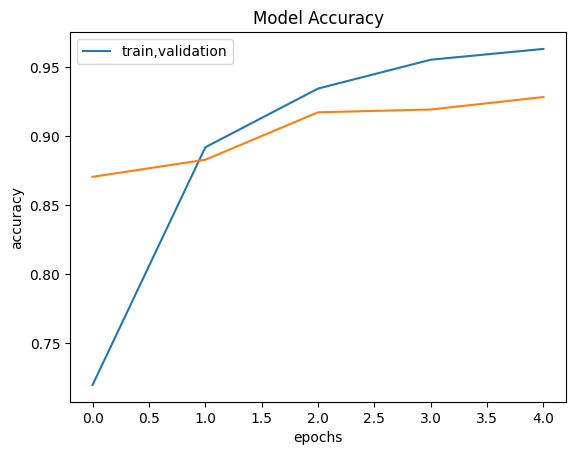

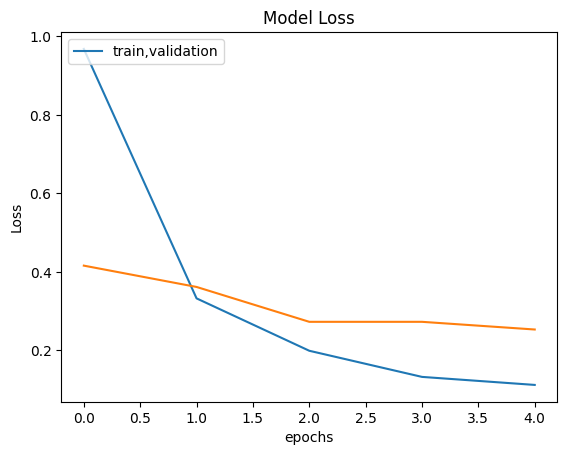

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train,validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train,validation'],loc='upper left')
plt.show()

In [46]:
def load_and_preprocess(image_path,target_size=(224,224)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255.
  return img_array


In [47]:
def predict_image_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess(image_path)
  prediction=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name

In [48]:
class_indices={v:k for k,v in train_gen.class_indices.items()}

In [49]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [50]:
json.dump(class_indices,open('class_indices.json','w'))

In [51]:
image_path='/content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
Grape___Esca_(Black_Measles)


In [55]:
model.save('/content/drive/MyDrive/Models/plant_disease_prediction_model.h5')